In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

In [94]:
item_category=pd.read_csv('item_categories.csv')
items=pd.read_csv('items.csv')
sales_train=pd.read_csv('sales_train.csv')
shops=pd.read_csv('shops.csv')
test=pd.read_csv('test.csv')

In [95]:
item_category.tail()

,item_category_name,item_category_id
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82
83,Элементы питания,83


In [96]:
items.tail()

,item_name,item_id,item_category_id
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62
22169,Яйцо дракона (Игра престолов),22169,69


In [97]:
shops.tail()

,shop_name,shop_id
55,Цифровой склад 1С-Онлайн,55
56,"Чехов ТРЦ ""Карнавал""",56
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58
59,"Ярославль ТЦ ""Альтаир""",59


In [98]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [99]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [100]:
sales_train=sales_train.drop(['date','item_price'],axis=1)

In [101]:
montly_sale=sales_train.groupby(['shop_id','date_block_num'],as_index=False).agg(sales=('item_cnt_day','sum'))
montly_sale

,shop_id,date_block_num,sales
0,0,0,5578.0
1,0,1,6127.0
2,1,0,2947.0
3,1,1,3364.0
4,2,0,1146.0
...,...,...,...
1581,59,29,913.0
1582,59,30,992.0
1583,59,31,1214.0
1584,59,32,914.0


In [102]:
# Trying to find how many item sold each shop in 33 months
montly_sale.groupby('shop_id').sum()

,date_block_num,sales
shop_id,,
0,1,11705.0
1,1,6311.0
2,561,30620.0
3,561,28355.0
4,561,43942.0
5,561,42762.0
6,561,100489.0
7,561,67058.0
8,6,3595.0


As we can see above that if we sum all the date_block_num for any given store it suppose to be at least more than 33. if we consider that the store had been stayed open for all given 33 months. However as we can see that some of the values are below 33, it shows that some of the stores hadn't stayed open all the time. Some of them is closed during 33 months of period of time. For these reason in order to make future prediction we need to find these stores and delete from our data set. Even this is not an enough assumption for to find the store which had been closed. Because date_block_num is dependent to given item number that's why some of the values on that column shows too big such as arround 500.

In [103]:
sales=sales_train.groupby(['shop_id','item_id','date_block_num'],as_index=False).agg(sales=('item_cnt_day','sum'))
sales

,shop_id,item_id,date_block_num,sales
0,0,30,1,31.0
1,0,31,1,11.0
2,0,32,0,6.0
3,0,32,1,10.0
4,0,33,0,3.0
...,...,...,...,...
1609119,59,22164,27,2.0
1609120,59,22164,30,1.0
1609121,59,22167,9,1.0
1609122,59,22167,11,2.0


In [104]:
NonActive_Stores = []
for i in sales['shop_id'].unique():
    stores = montly_sale[montly_sale['shop_id'] == i]['date_block_num'].unique()
    if np.amax(stores) < 33:  # Stores are suppose to be actived during the 33 months period of time
        NonActive_Stores.append(i)
print('These are the stores which are not active')
print(NonActive_Stores)

These are the stores which are not active
[0, 1, 8, 11, 13, 17, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]


In [105]:
sales2=sales_train.groupby(['shop_id','item_id','date_block_num'],as_index=False).agg(sales=('item_cnt_day','sum'))
for i in NonActive_Stores:
    sales2.drop(sales[(sales['shop_id'] ==i)].index, inplace=True)
sales2=sales2.reset_index()
sales2=sales2.drop(columns=['index'],axis=1)
sales2

,shop_id,item_id,date_block_num,sales
0,2,27,0,1.0
1,2,27,17,1.0
2,2,30,2,1.0
3,2,30,5,1.0
4,2,30,15,1.0
...,...,...,...,...
1326176,59,22164,27,2.0
1326177,59,22164,30,1.0
1326178,59,22167,9,1.0
1326179,59,22167,11,2.0


In [106]:
print(len(sales)-len(sales2),'Rows are deleted because of Non-Active Stores')

282943 Rows are deleted because of Non-Active Stores


In [107]:
monthlysale=sales2.groupby(['shop_id','date_block_num'],as_index=False).agg(totalsales=('sales','sum'))
monthlysale

,shop_id,date_block_num,totalsales
0,2,0,1146.0
1,2,1,488.0
2,2,2,753.0
3,2,3,583.0
4,2,4,553.0
...,...,...,...
1328,59,29,913.0
1329,59,30,992.0
1330,59,31,1214.0
1331,59,32,914.0


In [108]:
timeseries=np.zeros(shape=(59,35))
shopid_list=list(set(monthlysale['shop_id'].values))
datelist=list(set(monthlysale['date_block_num'].values))

monthlysale=monthlysale.pivot(index='shop_id', columns='date_block_num', values='totalsales')
monthlysale.tail()

date_block_num,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
shop_id,,,,,,,,,,,,,,,,,,,,,
55,NaN,NaN,NaN,NaN,852.0,728.0,795.0,719.0,812.0,916.0,...,6429.0,2551.0,2769.0,3422.0,2117.0,1909.0,1658.0,1976.0,6867.0,1972.0
56,3238.0,2655.0,3099.0,2153.0,2140.0,3105.0,3294.0,3311.0,2829.0,2375.0,...,2444.0,1691.0,1393.0,1237.0,1315.0,1566.0,1491.0,1604.0,1194.0,1263.0
57,NaN,NaN,6586.0,5493.0,5233.0,5987.0,5827.0,5413.0,5213.0,5686.0,...,4143.0,3540.0,3113.0,2860.0,2408.0,2440.0,2352.0,2780.0,2266.0,2316.0
58,NaN,NaN,3773.0,2831.0,2308.0,2972.0,3122.0,2863.0,2735.0,3022.0,...,2519.0,2360.0,2359.0,1710.0,1378.0,1554.0,1689.0,1738.0,1319.0,1446.0
59,2017.0,1897.0,2028.0,1388.0,1374.0,1707.0,1747.0,2048.0,2008.0,1751.0,...,1293.0,1206.0,1199.0,1054.0,916.0,913.0,992.0,1214.0,914.0,790.0


In [109]:
# Filling NaN values by zero
monthlysale=monthlysale.fillna(0)

#Taking abs of the negative values
monthlysale=monthlysale.abs()

monthlysale.head(10)

date_block_num,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
shop_id,,,,,,,,,,,,,,,,,,,,,
2,1146.0,488.0,753.0,583.0,553.0,832.0,807.0,875.0,945.0,795.0,...,987.0,907.0,762.0,859.0,843.0,804.0,785.0,942.0,822.0,727.0
3,767.0,798.0,959.0,647.0,710.0,784.0,721.0,890.0,1026.0,793.0,...,977.0,738.0,741.0,740.0,731.0,672.0,535.0,666.0,745.0,613.0
4,2114.0,2025.0,2060.0,285.0,1211.0,1464.0,1378.0,1713.0,1536.0,1482.0,...,1188.0,980.0,978.0,899.0,893.0,793.0,842.0,947.0,732.0,831.0
5,0.0,877.0,1355.0,1008.0,1110.0,1393.0,1265.0,1510.0,1298.0,1267.0,...,1404.0,1101.0,1109.0,1054.0,1012.0,954.0,991.0,1294.0,1092.0,1052.0
6,3686.0,4007.0,4519.0,3168.0,3022.0,3847.0,3360.0,3702.0,4208.0,3675.0,...,2328.0,2329.0,1981.0,1998.0,1748.0,1539.0,1484.0,1575.0,1725.0,1802.0
7,2495.0,2513.0,2460.0,1540.0,1647.0,2085.0,2031.0,2397.0,2599.0,2236.0,...,2084.0,1847.0,1430.0,1340.0,1217.0,1235.0,1327.0,1409.0,1287.0,1212.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6526.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3186.0
10,935.0,1026.0,1017.0,756.0,683.0,764.0,800.0,755.0,1027.0,1013.0,...,628.0,0.0,565.0,594.0,466.0,441.0,449.0,442.0,519.0,428.0
12,842.0,1209.0,1419.0,1364.0,917.0,1710.0,723.0,1599.0,2032.0,1890.0,...,2832.0,1854.0,1886.0,3244.0,3949.0,1830.0,1554.0,1471.0,5215.0,4181.0


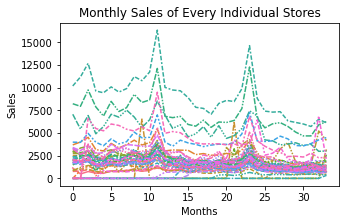

In [110]:
fig,ax = plt.subplots(figsize=(5,3))
sns.lineplot(data=np.transpose(monthlysale.iloc[0:]))
ax.get_legend().set_visible(False)
plt.title('Monthly Sales of Every Individual Stores')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

# for i in range(len(monthlysale)):
#     sns.lineplot(data=monthlysale.iloc[i])
#     plt.xlabel('Months')
#     plt.ylabel('Values')
#     plt.show()

In [111]:
monthlysale=monthlysale.T

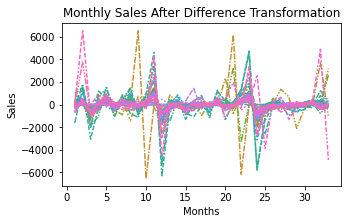

In [112]:
difference1=monthlysale[:].diff(periods=1)
difference1=difference1[1:]
fig,ax = plt.subplots(figsize=(5,3))
sns.lineplot(data=difference1)
ax.get_legend().set_visible(False)
plt.title('Monthly Sales After Difference Transformation')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


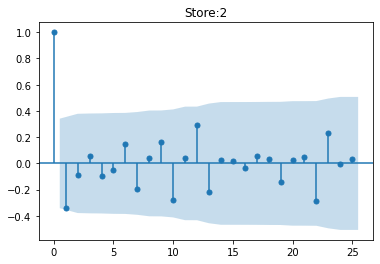

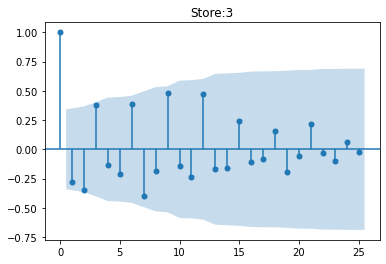

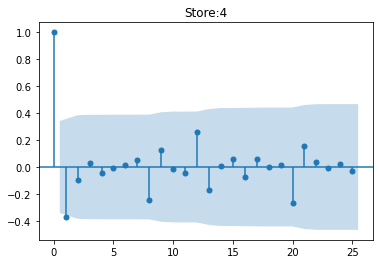

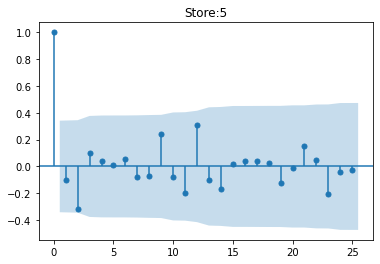

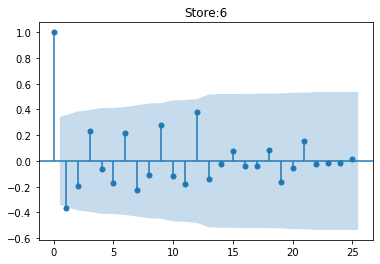

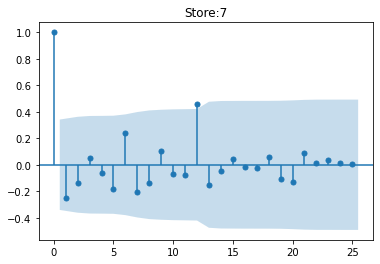

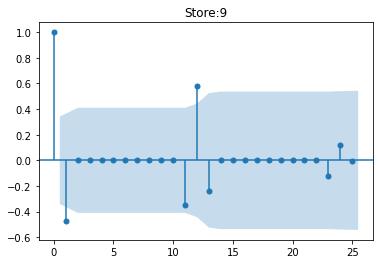

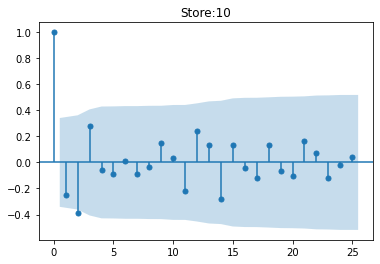

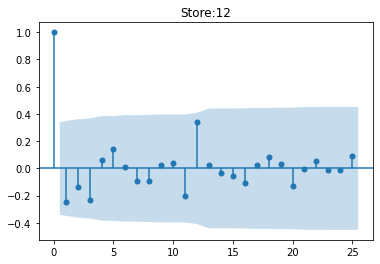

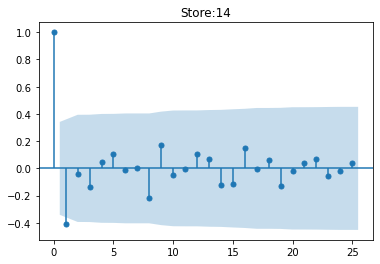

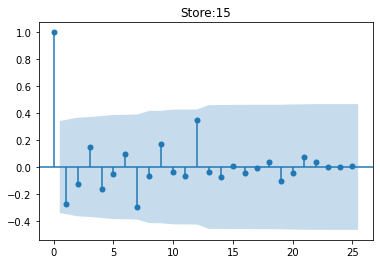

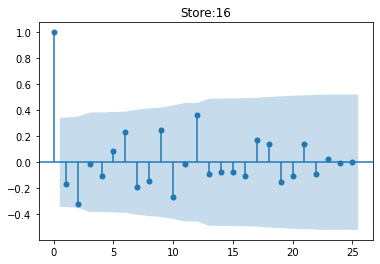

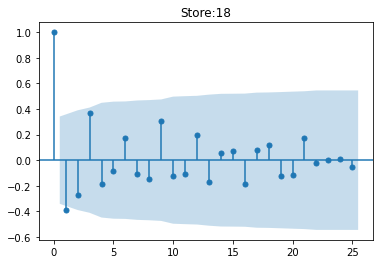

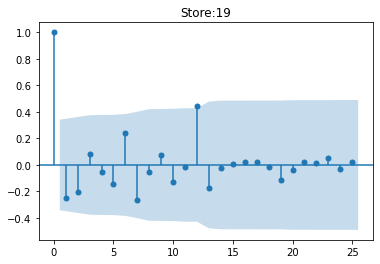

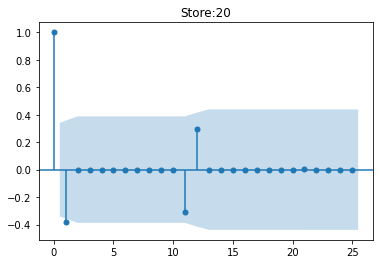

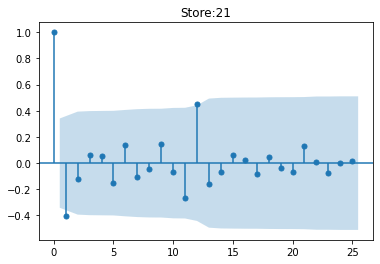

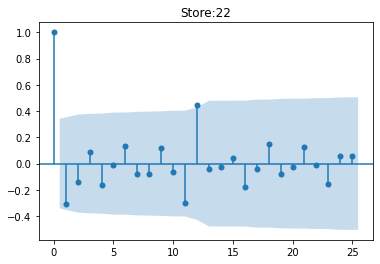

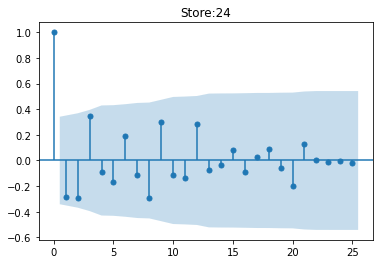

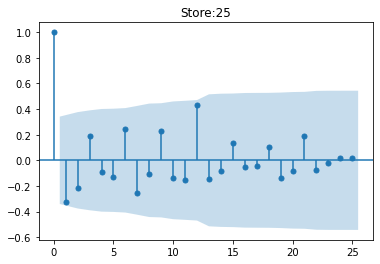

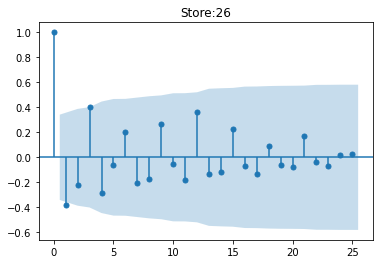

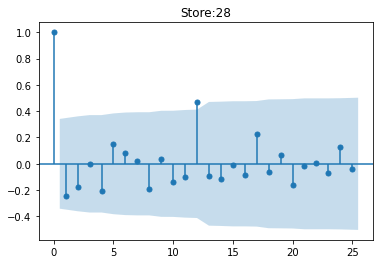

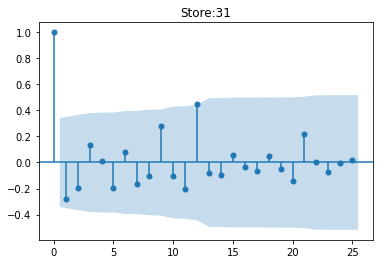

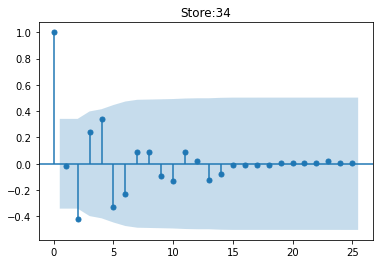

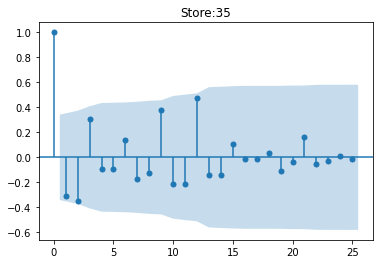

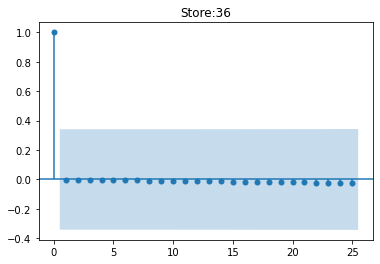

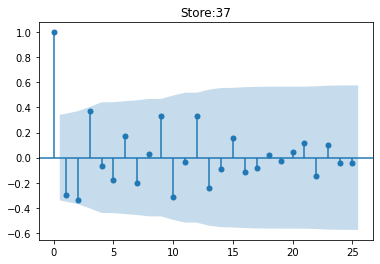

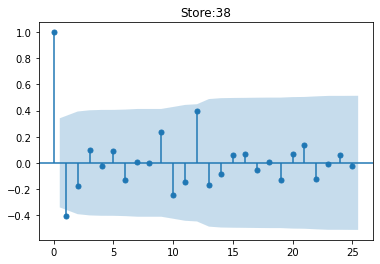

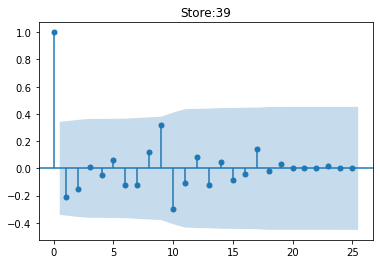

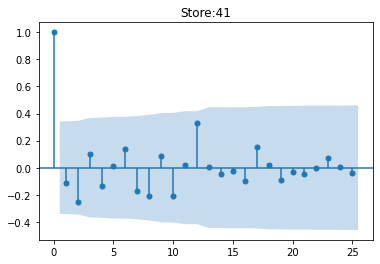

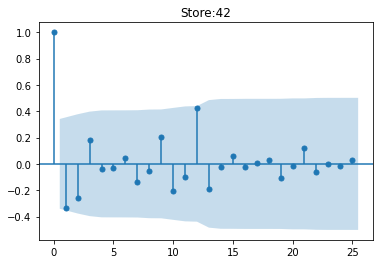

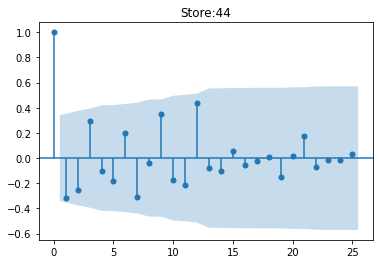

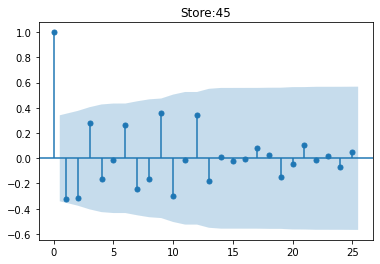

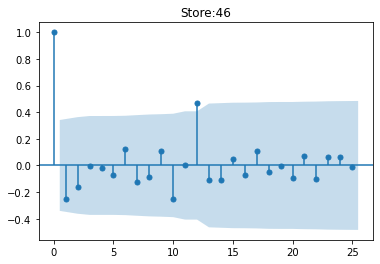

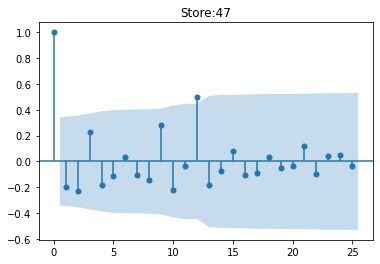

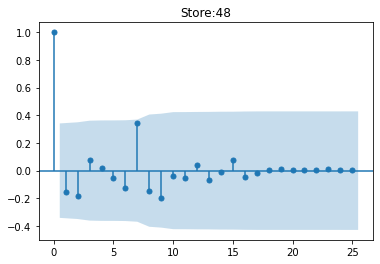

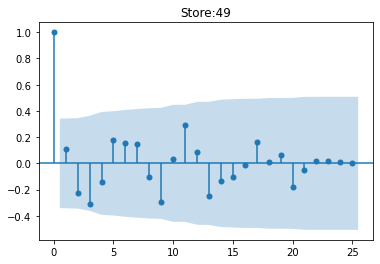

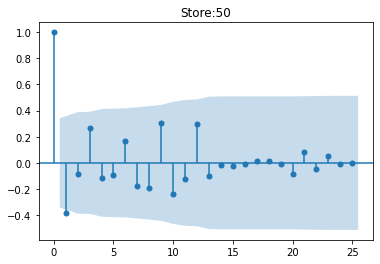

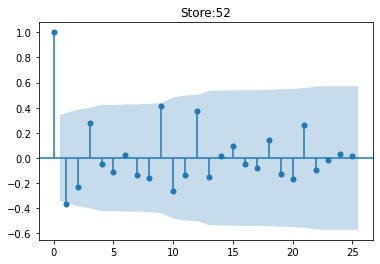

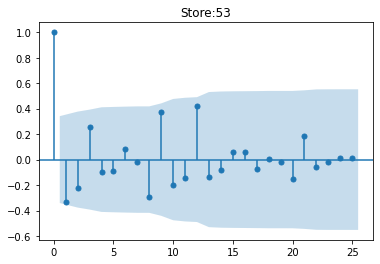

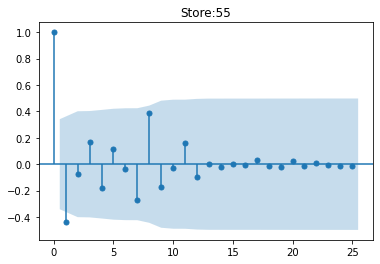

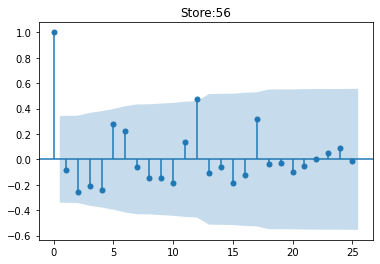

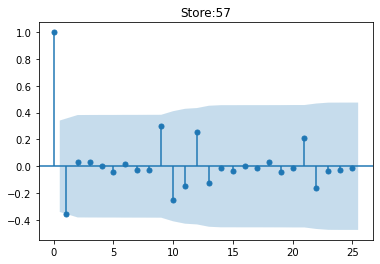

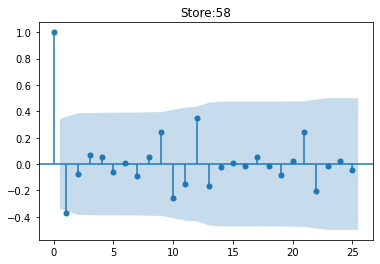

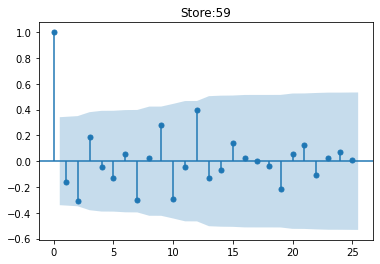

In [118]:
for i in shopid_list:
    plot_acf(difference1[i], lags=25);
    plt.title('Store:'+str(i))

C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.

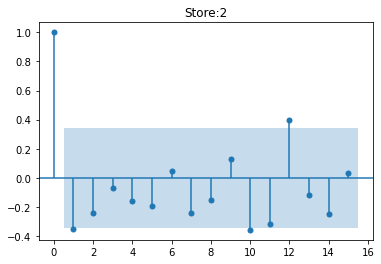

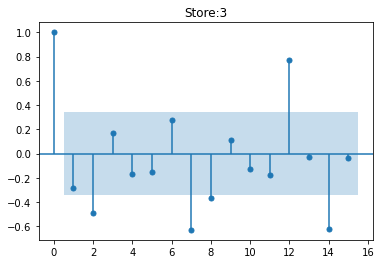

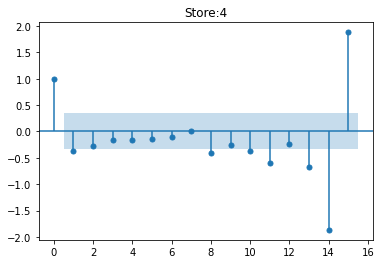

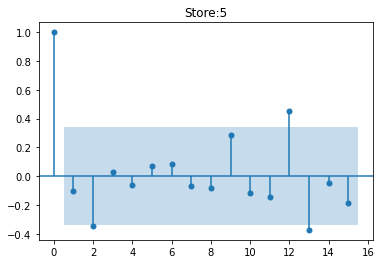

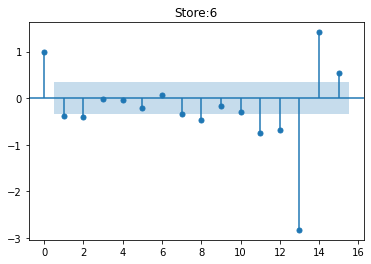

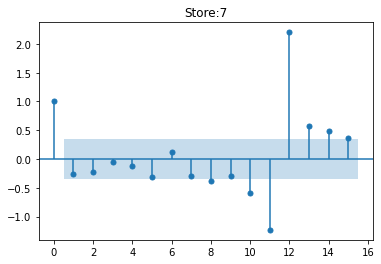

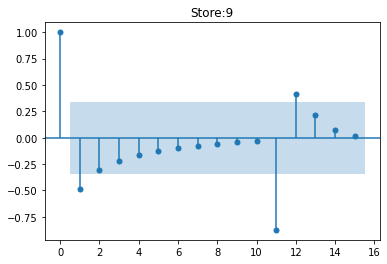

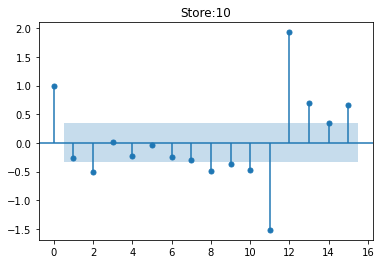

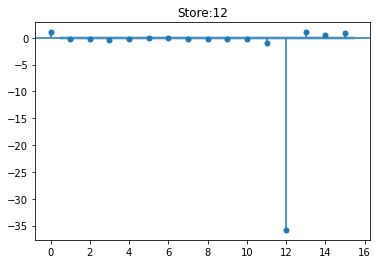

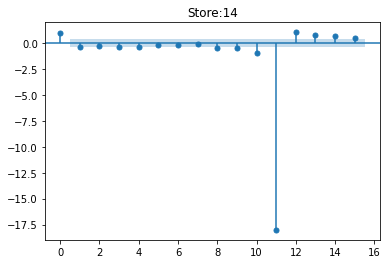

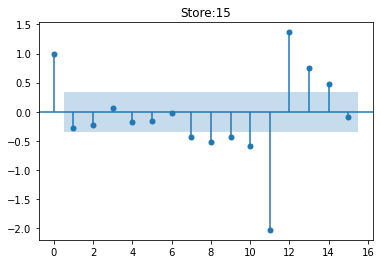

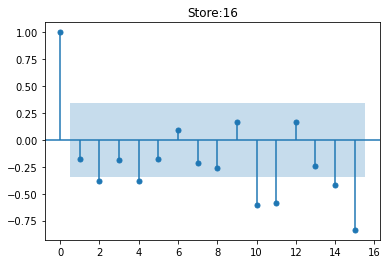

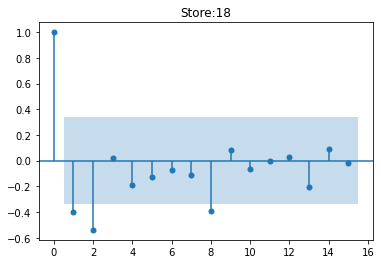

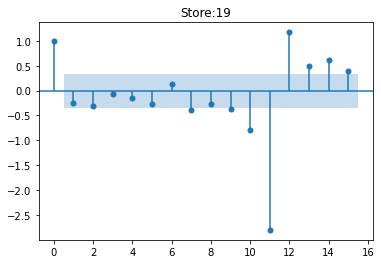

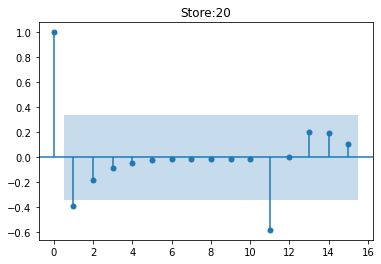

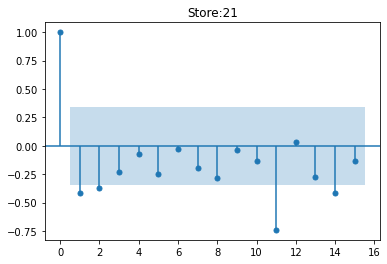

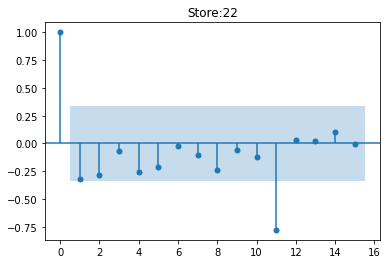

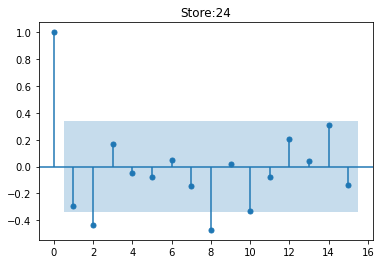

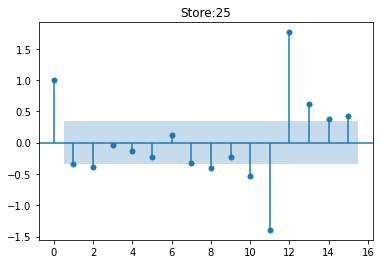

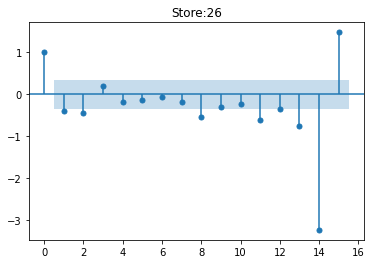

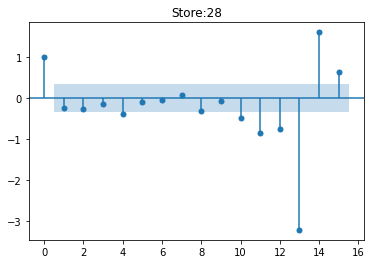

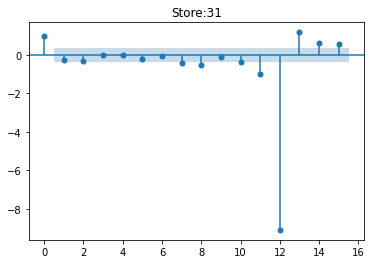

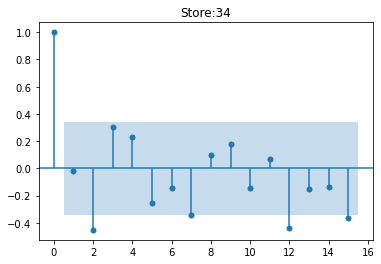

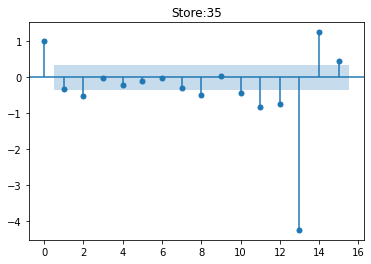

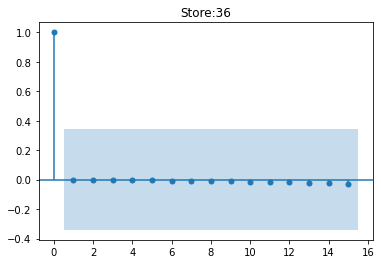

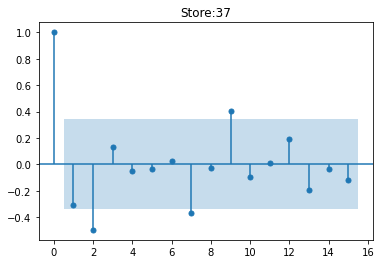

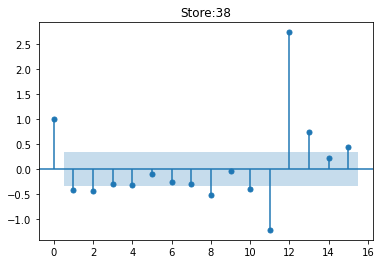

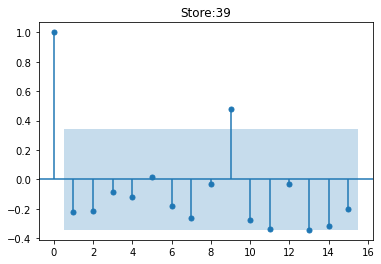

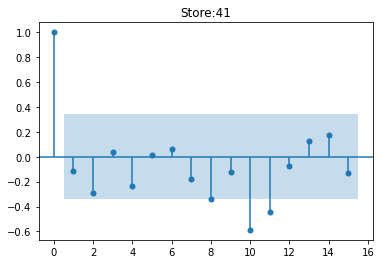

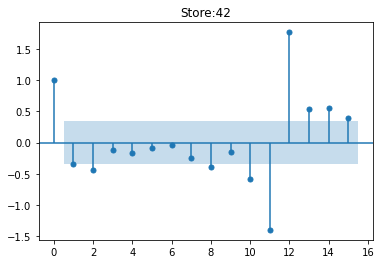

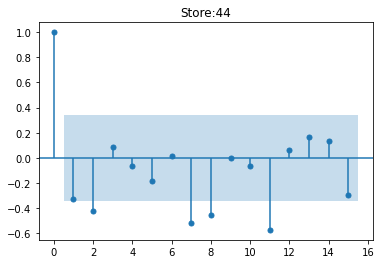

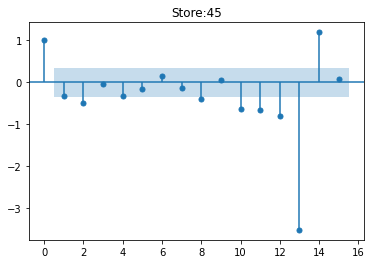

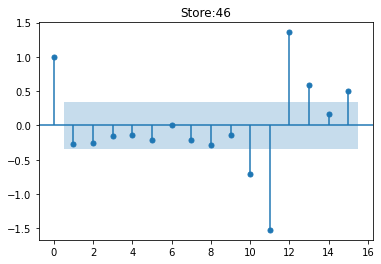

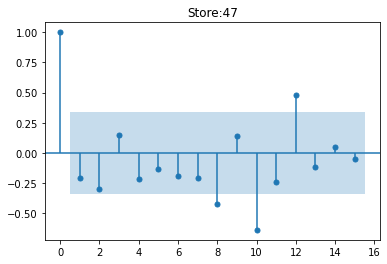

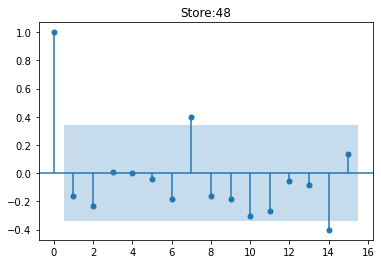

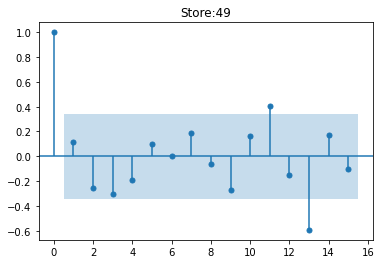

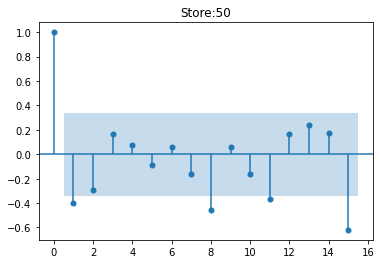

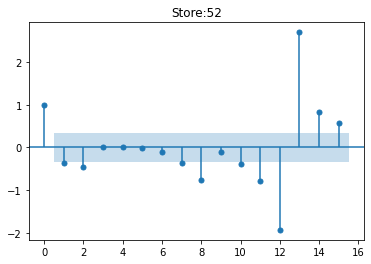

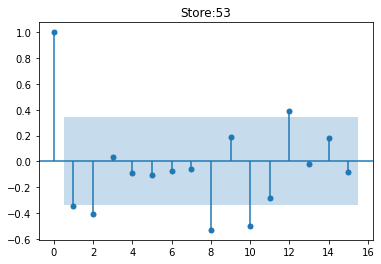

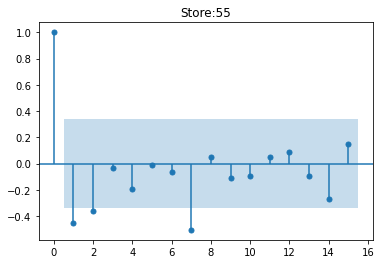

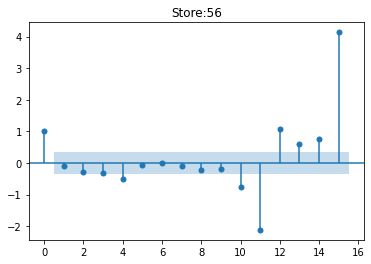

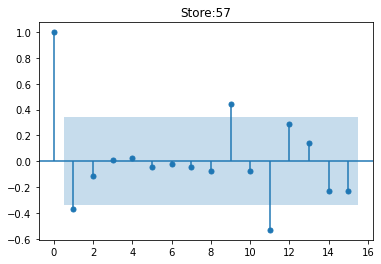

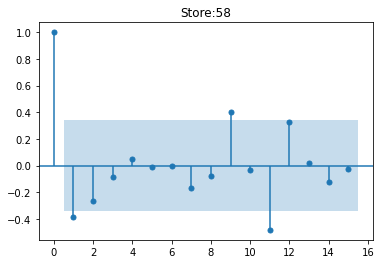

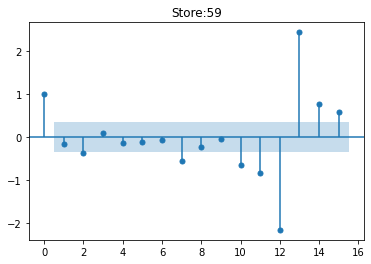

In [122]:
for i in shopid_list:
    plot_pacf(difference1[i], lags=15);
    plt.title('Store:'+str(i))

In [194]:
# shopid_list=list(set(sales2['shop_id'].values))
# itemid_list=list(set(sales2['item_id'].values))

# datelist=list(set(sales2['date_block_num'].values))
# new_data=sales2.pivot(index=shopid_list, columns=date_list, values=sales2['sales'].values)
# new_data

In [91]:

# itemMat = sales2.groupby(['date_block_num', 'item_id'], as_index = False).agg(MonthSales = ('sales', 'sum')).astype(np.int32)

# sales2 = pd.merge(sales2, itemMat, how='left', on=['date_block_num', 'item_id']).fillna(0)
# shopMat = sales2.groupby(['date_block_num', 'shop_id'], as_index = False).agg(shopMonth = ('sales', 'sum')).astype(np.int32)


# sales2 = pd.merge(sales2, shopMat, how='left', on=['date_block_num', 'shop_id']).fillna(0)
# sales2

In [92]:
# targetMat = sales2.groupby(['shop_id', 'date_block_num', 'item_id'], as_index=False).agg(target = ('item_cnt_day', 'sum'))
# featMat = pd.merge(featMat, targetMat, how='left', on=featCols).fillna(0)

# featMat = pd.merge(featMat, itemMat, how='left', on=['date_block_num', 'item_id']).fillna(0)
# featMat = pd.merge(featMat, shopMat, how='left', on=['date_block_num', 'shop_id']).fillna(0)

In [89]:
# output_file= 'OUTPUT1.txt' 
# fOut = open(output_file, 'w')
# matrix=np.zeros(shape=(len(montly_sale),33))
# np.shape(matrix)

In [88]:
# fOut.close()

In [87]:

# montly_sale[months[0]]=montly_sale.iloc[0][3]
# montly_sale
# month_df=pd.DataFrame(columns=months)

# for i in range(0,33):
#     for a in range(len(montly_sale)):
#         if montly_sale.iloc[a][2]==i:
#             if montly_sale.iloc[a][3]>0:
#                 matrix[a][i]=montly_sale.iloc[a][3]
#             else:
#                 matrix[a][i]=0
#             Outstr=str(matrix[a][0])+'|'+str(matrix[a][1])+'|'+str(matrix[a][2])+'|'+str(matrix[a][3])+'|'+str(matrix[a][4])+'|'+str(matrix[a][5])+'|'+str(matrix[a][6])+'|'+str(matrix[a][7])+'|'+str(matrix[a][8])+'|'+str(matrix[a][9])+'|'+str(matrix[a][10])+'|'+str(matrix[a][11])+'|'+str(matrix[a][12])+'|'+str(matrix[a][13])+'|'+str(matrix[a][14])+'|'+str(matrix[a][15])+'|'+str(matrix[a][16])+'|'+str(matrix[a][17])+'|'+str(matrix[a][18])+'|'+str(matrix[a][19])+'|'+str(matrix[a][20])+'|'+str(matrix[a][21])+'|'+str(matrix[a][22])+'|'+str(matrix[a][23])+'|'+str(matrix[a][24])+'|'+str(matrix[a][25])+'|'+str(matrix[a][26])+'|'+str(matrix[a][27])+'|'+str(matrix[a][28])+'|'+str(matrix[a][29])+'|'+str(matrix[a][30])+'|'+str(matrix[a][31])+'|'+str(matrix[a][32])
#             fOut.write(Outstr+'\n')